Importing Important Modules and Libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics
from xgboost import XGBRegressor

In [2]:
df = pd.read_csv('/content/boxoffice.csv')
df.head()

,title,domestic_revenue,world_revenue,distributor,opening_revenue,opening_theaters,budget,MPAA,genres,release_days
0,The Avengers,6026491,1274885664,Warner Bros.,163620146,253,174687337,R,Animation,16
1,Titanic,169411543,1132871091,Disney,85549990,122,103948486,G,Action,103
2,Jurassic Park,107836098,583329845,Sony,55681429,3826,122104991,NC-17,Horror,89
3,Avatar,51433697,1225323391,Disney,109775324,3868,46431596,G,Horror,85
4,The Lion King,142791649,604140729,Warner Bros.,59476800,2934,203513696,R,Comedy,158


In [3]:
df.shape

(2694, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2694 entries, 0 to 2693
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   title             2694 non-null   object
 1   domestic_revenue  2694 non-null   int64 
 2   world_revenue     2694 non-null   int64 
 3   distributor       2694 non-null   object
 4   opening_revenue   2694 non-null   int64 
 5   opening_theaters  2694 non-null   int64 
 6   budget            2694 non-null   int64 
 7   MPAA              2694 non-null   object
 8   genres            2694 non-null   object
 9   release_days      2694 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 210.6+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
domestic_revenue,2694.0,1.508539e+08,8.579997e+07,827765.0,7.673272e+07,152572473.5,2.247314e+08,2.998107e+08
world_revenue,2694.0,7.719177e+08,4.284414e+08,3261301.0,3.991135e+08,766555142.5,1.143920e+09,1.499310e+09
opening_revenue,2694.0,9.971321e+07,5.721762e+07,138569.0,5.033848e+07,99814175.0,1.489805e+08,1.999336e+08
opening_theaters,2694.0,2.263039e+03,1.298559e+03,10.0,1.161000e+03,2271.5,3.392250e+03,4.499000e+03
budget,2694.0,1.537996e+08,8.557624e+07,5197977.0,7.861876e+07,156256716.0,2.274832e+08,2.998597e+08
release_days,2694.0,9.089755e+01,5.089404e+01,1.0,4.700000e+01,91.0,1.350000e+02,1.790000e+02


Data Cleaning :

We are predicting only on Domestic Revenue so we'll be dropping World and Opening Revenue.

In [6]:
df.drop(['world_revenue'], axis = 1, inplace=True)
df.drop(['opening_revenue'], axis = 1, inplace=True)
df.head()

,title,domestic_revenue,distributor,opening_theaters,budget,MPAA,genres,release_days
0,The Avengers,6026491,Warner Bros.,253,174687337,R,Animation,16
1,Titanic,169411543,Disney,122,103948486,G,Action,103
2,Jurassic Park,107836098,Sony,3826,122104991,NC-17,Horror,89
3,Avatar,51433697,Disney,3868,46431596,G,Horror,85
4,The Lion King,142791649,Warner Bros.,2934,203513696,R,Comedy,158


In [7]:
df.isnull().sum()

,0
title,0
domestic_revenue,0
distributor,0
opening_theaters,0
budget,0
MPAA,0
genres,0
release_days,0


Since we have no null values the given dataset is quite clean so we don't need to fill anywhere.

---

EDA Process

<Axes: xlabel='MPAA', ylabel='count'>

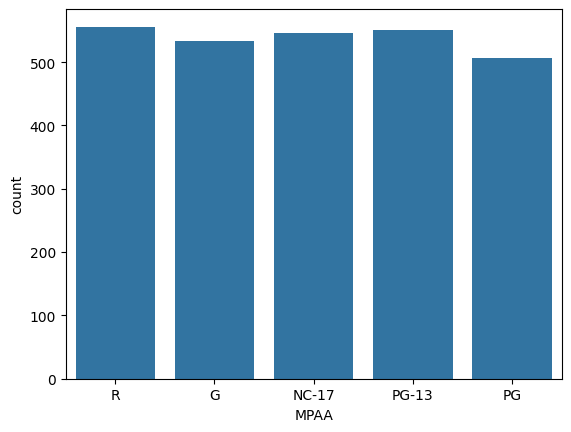

In [8]:
sns.countplot(x=df['MPAA'])

Text(0.5, 1.0, 'Sum of revenue generated by MPAA')

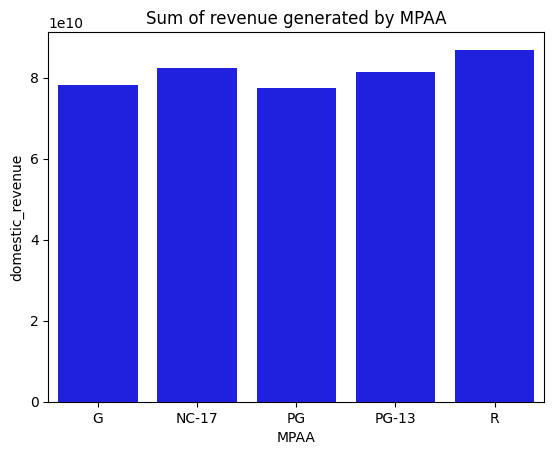

In [9]:
sum_of_dgen = df.groupby('MPAA')['domestic_revenue'].sum()
label = df.groupby('MPAA')['MPAA'].first()
sns.barplot(x=label, y=sum_of_dgen, color='blue')
plt.title("Sum of revenue generated by MPAA")

We infer that R Rated and PG Rated movies generate the most Domestic Revenue

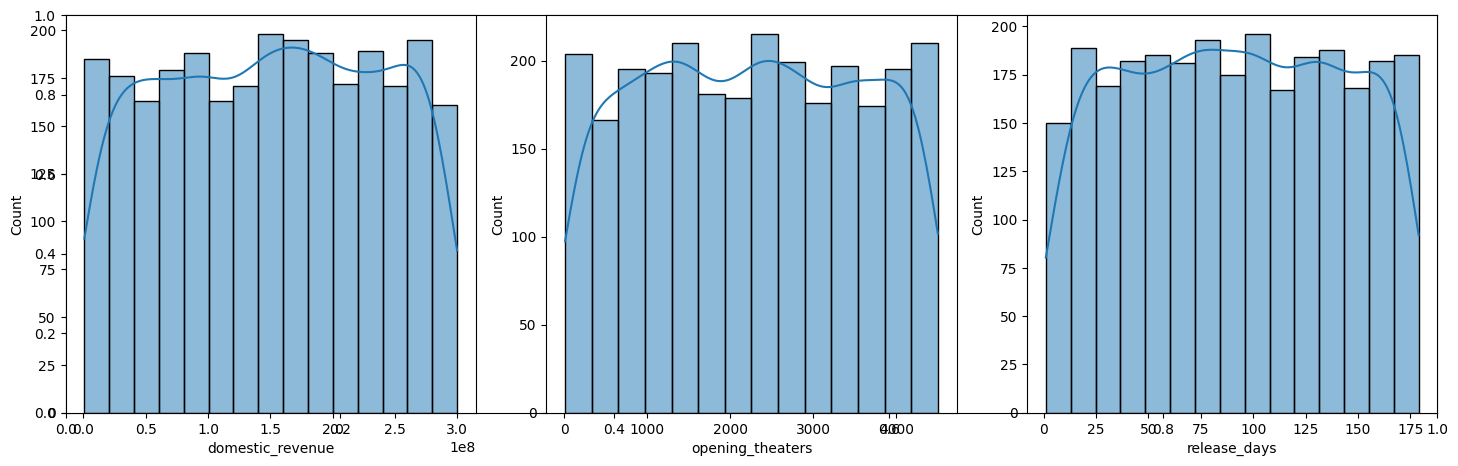

In [10]:
plt.subplots(figsize=(15, 5))

features = ['domestic_revenue', 'opening_theaters', 'release_days']
for i, col in enumerate(features):
    plt.subplot(1, 3, i+1)
    sns.histplot(df[col], kde=True,)
plt.tight_layout()
plt.show()

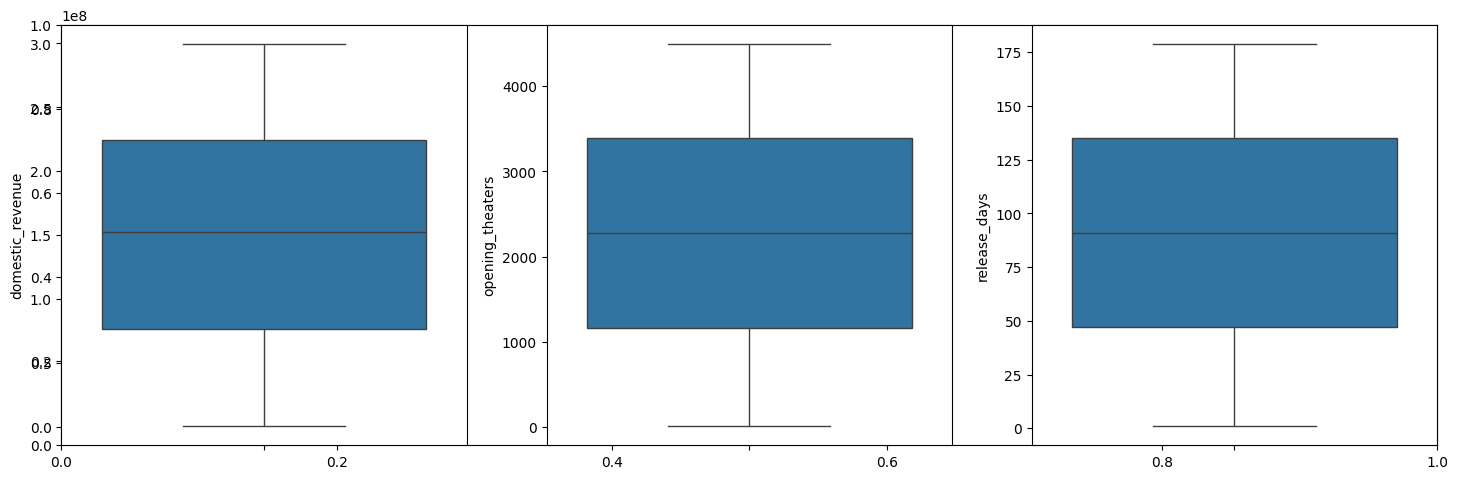

In [11]:
plt.subplots(figsize=(15,5))
for i, col in enumerate(features):
  plt.subplot(1, 3, i+1)
  sns.boxplot(df[col])
plt.tight_layout()
plt.show()

We don't see any particular outlier in the data.

In [12]:
for col in features:   #To standatdize the above features close to normal distributon
  df[col] = df[col].apply(lambda x:np.log10(x))

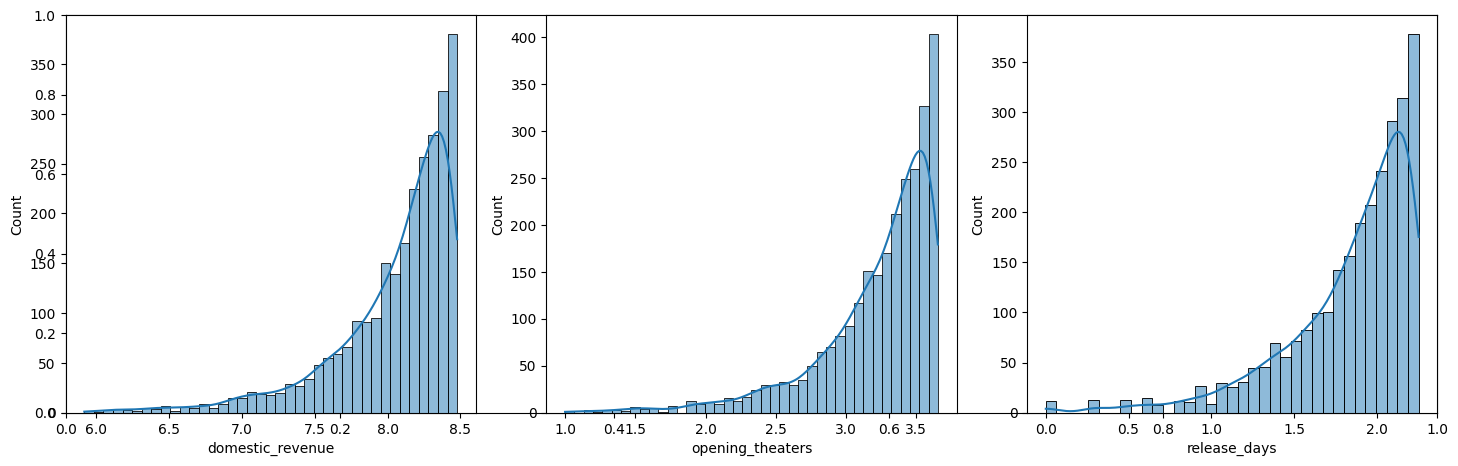

In [13]:
plt.subplots(figsize=(15, 5))

for i, col in enumerate(features):
    plt.subplot(1, 3, i+1)
    sns.histplot(df[col], kde=True,)
plt.tight_layout()
plt.show()

In [14]:
# vectorizer = CountVectorizer()
# vectorizer.fit(df['genres'])
# vectorizer.transform(df['genres']).toarray()

# genres = vectorizer.get_feature_names_out()
# for i, name in enumerate(genres):
#   df[name] = features[:, i]
# for i,name in enumerate(genres):

In [15]:
for col in ['distributor', 'MPAA','genres']:   #encodes all the data points
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [16]:
y = df['domestic_revenue']
y

,domestic_revenue
0,6.780065
1,8.228943
2,8.032764
3,7.711248
4,8.154703
...,...
2689,7.581531
2690,7.801439
2691,8.434183
2692,8.428555


In [19]:
x = df.drop(['title','budget','domestic_revenue'], axis=1)
x

,distributor,opening_theaters,MPAA,genres,release_days
0,4,2.403121,4,1,1.204120
1,0,2.086360,0,0,2.012837
2,2,3.582745,1,4,1.949390
3,0,3.587486,0,4,1.929419
4,4,3.467460,4,2,2.198657
...,...,...,...,...,...
2689,0,3.548021,0,2,1.963788
2690,0,3.501196,3,2,2.193125
2691,0,3.389166,1,3,2.164353
2692,0,2.820201,0,5,2.230449


In [34]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 22)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((2155, 5), (539, 5), (2155,), (539,))

In [21]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [35]:
x_train.shape, x_test.shape

((2155, 5), (539, 5))

In [36]:
#model Training

model = XGBRegressor()
model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [41]:
from sklearn.metrics import mean_absolute_error as mae

y_pred = model.predict(x_train)
print("Training Accuracy Score of model : ",mae(y_train,y_pred))

y_pred = model.predict(x_test)
print("Testing Accuracy Score of model : ",mae(y_test,y_pred))

Training Accuracy Score of model :  0.09870192264308711
Testing Accuracy Score of model :  0.368384173161979


The mean_absolute_error we are looking at is between the predicted and actual values so, the actual error will be way more than what we are seeing right here.

Thank you so much for going through my work till the end. Feel free to get in touch if you have any doubts. :)